In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('ggplot')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

# ZikaVirus Dataset
Countries : 
1. Argentina 
1. Brazil
1. Colombia
1. Dominican Republic
1. Ecuador
1. El Salvador
1. Guatemala
1. Haiti
1. Mexico
1. Nicaragua
1. Pamana
1. Puerto Rico
1. U.S. Virgin Islands
1. United States

In [2]:
df = pd.read_csv('zikavirus_dataset.csv')
df.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [3]:
df.shape

(242450, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242450 entries, 0 to 242449
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   report_date    242450 non-null  object
 1   location       242450 non-null  object
 2   location_type  242450 non-null  object
 3   data_field     242450 non-null  object
 4   cases          242450 non-null  object
dtypes: object(5)
memory usage: 9.2+ MB


# Weather Dataset


1. maxtempC - Maximum temperature of the day in degree Celsius
1. totalSnow_cm - Total snowfall amount in cm
1. sunHour - Total sun hour
1. moon_illumination - A value is returned as %
1. DewPointC - Dew point temperature in degrees Celsius
1. FeelsLikeC - Feels like temperature in degrees Celsius
1. HeatIndexC - Heat index temperature in degrees Celsius
1. WindChillC - Wind chill temperature in degrees Celsius
1. WindGustKmph - Wind gust in kilometers per hour
1. cloudcover - Cloud cover amount in percentage (%)
1. humidity - Humidity in percentage (%)
1. precipMM - Precipitation in millimeters
1. pressure - Atmospheric pressure in millibars (mb)
1. tempC -Temperature in degrees Celsius.
1. visibility - Visibility in kilometers
1. winddirDegree -  Wind direction in degrees
1. windspeedKmph - Wind speed in kilometers per hour

In [3]:
weather = pd.read_csv('weatherdataset.csv')
weather.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,date,time
0,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,9,18,18,18,48,0,55,0.0,1023,18,10,146,31,Argentina,2016-03-19,00:00:00
1,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,7,15,15,15,41,0,58,0.0,1023,15,10,144,27,Argentina,2016-03-19,03:00:00
2,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,7,11,13,11,38,0,67,0.0,1023,13,10,150,24,Argentina,2016-03-19,06:00:00
3,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,8,16,16,16,33,0,60,0.0,1025,16,10,142,28,Argentina,2016-03-19,09:00:00
4,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,10,20,20,20,27,8,51,0.0,1023,20,10,108,24,Argentina,2016-03-19,12:00:00


In [8]:
weather.iloc[4000:].head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,date,time
4000,26,19,0.0,11.6,5,76,08:32 PM,08:36 AM,06:16 AM,06:17 PM,19,21,21,21,11,48,93,1.2,1015,21,10,12,5,Brazil,2016-03-26,00:00:00
4001,26,19,0.0,11.6,5,76,08:32 PM,08:36 AM,06:16 AM,06:17 PM,18,20,20,20,10,44,94,1.1,1014,20,10,21,5,Brazil,2016-03-26,03:00:00
4002,26,19,0.0,11.6,5,76,08:32 PM,08:36 AM,06:16 AM,06:17 PM,18,19,19,19,8,48,93,0.0,1015,19,10,19,4,Brazil,2016-03-26,06:00:00
4003,26,19,0.0,11.6,5,76,08:32 PM,08:36 AM,06:16 AM,06:17 PM,20,25,25,23,5,45,86,0.9,1017,23,10,71,4,Brazil,2016-03-26,09:00:00
4004,26,19,0.0,11.6,5,76,08:32 PM,08:36 AM,06:16 AM,06:17 PM,20,28,28,26,11,45,71,1.5,1016,26,10,19,9,Brazil,2016-03-26,12:00:00


In [158]:
# drop unnecessary columns
weather = weather.drop(['moon_illumination','moonrise','moonset','sunrise','sunset'],axis=1)

In [159]:
weather.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,date,time
0,22,13,0.0,11.6,5,9,18,18,18,48,0,55,0.0,1023,18,10,146,31,Argentina,2016-03-19,00:00:00
1,22,13,0.0,11.6,5,7,15,15,15,41,0,58,0.0,1023,15,10,144,27,Argentina,2016-03-19,03:00:00
2,22,13,0.0,11.6,5,7,11,13,11,38,0,67,0.0,1023,13,10,150,24,Argentina,2016-03-19,06:00:00
3,22,13,0.0,11.6,5,8,16,16,16,33,0,60,0.0,1025,16,10,142,28,Argentina,2016-03-19,09:00:00
4,22,13,0.0,11.6,5,10,20,20,20,27,8,51,0.0,1023,20,10,108,24,Argentina,2016-03-19,12:00:00


In [161]:
weather.shape

(59360, 21)

# Population Density Dataset

In [6]:
popden = pd.read_csv('06_population_density.csv')
popden.head()

,location,density_per_km
0,Argentina-Buenos_Aires,12625.800781
1,Argentina-CABA,12625.800781
2,Argentina-Cordoba,2404.108887
3,Argentina-Entre_Rios,72.495293
4,Argentina-Santa_Fe,208.092285


In [7]:
popden.shape

(1714, 2)

## Argentina

In [146]:
argentina = df[df["location"].str.startswith("Argentina")]
argentina.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [147]:
# drop unnecessary columns
argentina = argentina.drop(['location_type','data_field'],axis=1)

# create new column country and state
country = []
state = []

# iterate location
for mystring in argentina['location']:
    first_partitioned_string = mystring.rpartition('-')
    country_name = first_partitioned_string[0]
    state_name = first_partitioned_string[2]
    country.append(country_name.strip())
    state.append(state_name.strip())
    
argentina.insert(1, "country",country, True)  
argentina.insert(2, "state",state, True)
argentina = argentina.drop(['location'],axis=1)

# Convert our report_date columns to datetime datatype
argentina['report_date'] = pd.to_datetime(argentina['report_date'], format="%Y-%m-%d")

# covert string to an float
argentina['cases'] = argentina['cases'].astype(float)

# Replace nan value with 0,
argentina['cases'] = argentina['cases'].fillna(0)

# covert string to an float
argentina['cases'] = argentina['cases'].astype(int)

# create new year and month column from datetime
argentina['year'] = pd.DatetimeIndex(argentina['report_date']).year
argentina['month'] = pd.DatetimeIndex(argentina['report_date']).month

# rearrange columns
argentina = argentina[['report_date','year','month','country','state','cases']]

In [148]:
argentina.head()

,report_date,year,month,country,state,cases
0,2017-01-12,2017,1,Argentina,Buenos_Aires,0
1,2017-01-12,2017,1,Argentina,CABA,1
2,2017-01-12,2017,1,Argentina,Cordoba,2
3,2017-01-12,2017,1,Argentina,Entre_Rios,0
4,2017-01-12,2017,1,Argentina,Santa_Fe,2


In [149]:
argentina.shape

(5788, 6)

In [150]:
print('There are 14 province in argentina :\n')
print(argentina['state'].unique())

There are 14 province in argentina :

['Buenos_Aires' 'CABA' 'Cordoba' 'Entre_Rios' 'Santa_Fe' 'Mendoza'
 'San_Juan' 'San_Luis' 'Chaco' 'Corrientes' 'Formosa' 'Misiones'
 'Catamarca' 'Jujuy' 'La_Rioja' 'Salta' 'Sgo_Del_Estero' 'Tucuman'
 'Chubut' 'La_Pampa' 'Neuquen' 'Rio_Negro' 'Santa_Cruz' 'Tierra_del_Fuego']


In [151]:
popden_argentina = popden[popden["location"].str.startswith("Argentina")]
# create new column country and state
country = []
state = []

# iterate location
for mystring in popden_argentina['location']:
    first_partitioned_string = mystring.rpartition('-')
    country_name = first_partitioned_string[0]
    state_name = first_partitioned_string[2]
    country.append(country_name.strip())
    state.append(state_name.strip())
    
popden_argentina.insert(1, "country",country, True)  
popden_argentina.insert(2, "state",state, True)
popden_argentina = popden_argentina.drop(['location'],axis=1)

popden_argentina.head()

,country,state,density_per_km
0,Argentina,Buenos_Aires,12625.800781
1,Argentina,CABA,12625.800781
2,Argentina,Cordoba,2404.108887
3,Argentina,Entre_Rios,72.495293
4,Argentina,Santa_Fe,208.092285


In [152]:
argentina_monthly = argentina.groupby(['state']).cases.agg([sum])
argentina_monthly = argentina_monthly.reset_index()
argentina_monthly.head()

,state,sum
0,Buenos_Aires,793
1,CABA,647
2,Catamarca,59
3,Chaco,460
4,Chubut,47


In [153]:
argentina_monthly = pd.merge(argentina_monthly, popden_argentina, on=['state'], how='left') 
argentina_monthly

,state,sum,country,density_per_km
0,Buenos_Aires,793,Argentina,12625.800781
1,CABA,647,Argentina,12625.800781
2,Catamarca,59,Argentina,460.153595
3,Chaco,460,Argentina,121.331650
4,Chubut,47,Argentina,37.095642
5,Cordoba,238,Argentina,2404.108887
6,Corrientes,129,Argentina,837.728516
7,Entre_Rios,120,Argentina,72.495293
8,Formosa,95,Argentina,41.440811
9,Jujuy,1328,Argentina,146.108459


<AxesSubplot:ylabel='sum'>

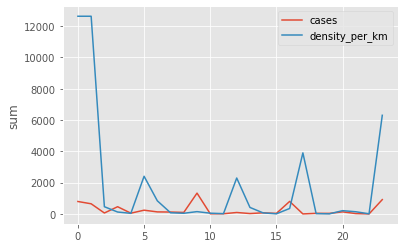

In [154]:
# Line chart showing daily global streams of 'Shape of You'
sns.lineplot(data=argentina_monthly['sum'], label="cases")

# Line chart showing daily global streams of 'Despacito'
sns.lineplot(data=argentina_monthly['density_per_km'], label="density_per_km")

<AxesSubplot:xlabel='sum', ylabel='density_per_km'>

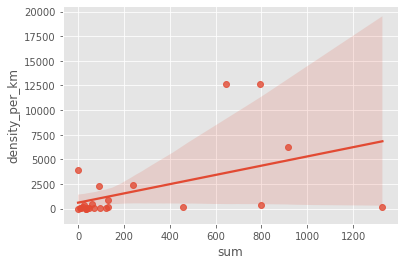

In [155]:
sns.regplot(y=argentina_monthly['density_per_km'], x=argentina_monthly['sum'])